<a href="https://colab.research.google.com/github/kavyashree-205/AMAZON-DATASET-ANALYSIS/blob/master/SAMPLE_AMAZON_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url="https://www.dataquest.io/wp-content/uploads/2019/09/amazon-orders.csv"

In [5]:
urllib.request.urlretrieve(url)

('/tmp/tmpk1wzlupe', <http.client.HTTPMessage at 0x7f4a82487fd0>)

In [6]:
df=pd.read_csv(url)

In [7]:
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


In [8]:
#gives the size of the data frame
df.shape

(59, 23)

In [11]:
#displaying all the field names of the dataset
df.columns

Index(['Order Date', 'Order ID', 'Payment Instrument Type', 'Website',
       'Purchase Order Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Subtotal', 'Shipping Charge',
       'Tax Before Promotions', 'Total Promotions', 'Tax Charged',
       'Total Charged', 'Buyer Name', 'Group Name'],
      dtype='object')

In [12]:
#replacing NaN values with zero
df=df.fillna(0)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [13]:
#finding the sum of total changes of the amazon products purchased
#to find the sum we need to remove the '$' sign 
a=df['Total Charged']
print(a.dtype)  #the type of data in total charged column is object which is string type
#we need to convert string type to float type to perferm basic arithmatic operations


object


In [14]:
#replaced '$' with ''
df['Total Charged']=df['Total Charged'].str.replace('$','')
print(df['Total Charged'].head())

0     36.93
1     16.99
2      9.99
3    156.12
4     14.99
Name: Total Charged, dtype: object


In [15]:
#converted strinbg type data to float values
df['Total Charged']=df['Total Charged'].astype(float)
print(df['Total Charged'].head())

0     36.93
1     16.99
2      9.99
3    156.12
4     14.99
Name: Total Charged, dtype: float64


In [16]:
#calculating the Total amount of money spent on amazon products
total_money=df['Total Charged'].sum()
print('Total amount of money spent on amazon products : ',total_money)


Total amount of money spent on amazon products :  1777.7300000000002


In [17]:
#finding the average amount spent on amazon product
average=df['Total Charged'].mean()
print('the average amount spent on amazon product : ',round(average,3))

the average amount spent on amazon product :  30.131


In [18]:
#finding out the highest amount spent on amazon product
max=df['Total Charged'].max()
print("highest amount spent on amazon product : ",max)

highest amount spent on amazon product :  210.99


In [19]:
#finding out the minimum amount spent on amazon product
min=np.min(df['Total Charged'])
print('The least amount spent on amazon product : ',min)

The least amount spent on amazon product :  1.04


In [20]:
#finding out the total tax amount payed
df['Tax Charged']=df['Tax Charged'].str.replace('$','')
df['Tax Charged']=df['Tax Charged'].astype(float)
total_tax=np.sum(df['Tax Charged'])
print('total tax amount payed : ',round(total_tax,4))


total tax amount payed :  52.61


In [21]:
#finding the overrall tax rate payed for the amazon products
tax_rate=(total_tax/total_money)*100
tax_rate=round(tax_rate,2)
print('The overrall tax rate payed for the amazon products : ',str(tax_rate)+'%')

The overrall tax rate payed for the amazon products :  2.96%


In [22]:
#finding the total shipping charges spent on amazon product
df['Shipping Charge']=df['Shipping Charge'].str.replace('$','')
df['Shipping Charge']=df['Shipping Charge'].astype(float)
total_sp=df['Shipping Charge'].sum()
print('The total shipping charges spent on amazon product : ',total_sp)

The total shipping charges spent on amazon product :  20.89


In [23]:
#converting the dates to the correct form for analysis
df['Order Date']=pd.to_datetime(df['Order Date'])
print(df['Order Date'].head())

0   2019-04-01
1   2019-04-01
2   2019-04-01
3   2019-04-04
4   2019-04-05
Name: Order Date, dtype: datetime64[ns]


Text(0.5, 1.0, 'ORDER DATE Vs TOTAL CHARGED')

<Figure size 432x288 with 0 Axes>

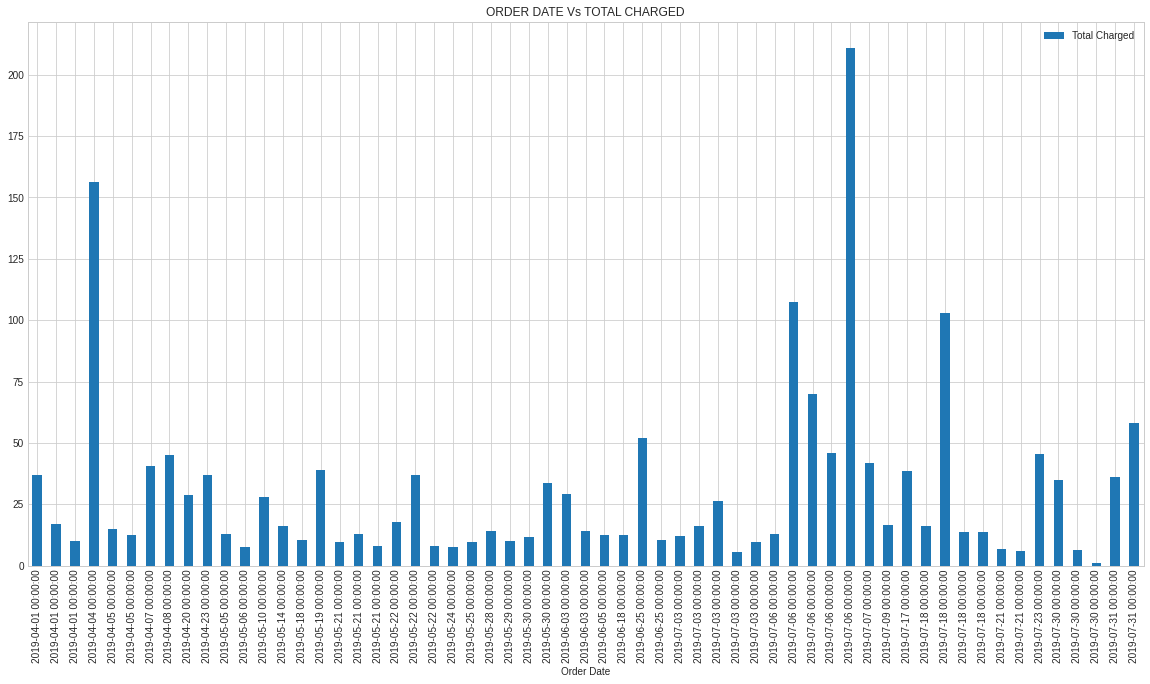

In [32]:
#bar chart of order date Vs total charge which indicates the purchased amount at every instance of purchase
plt.figure()
plt.style.use('seaborn-whitegrid')
df.plot.bar(x='Order Date',y='Total Charged',rot=90,figsize=(20,10))
plt.title('ORDER DATE Vs TOTAL CHARGED')


In [25]:
#In the above representation there is a flaw, the total charge of few order dates are repepeated according to number of order items to correct those
#we group the order dates and get the sum of all orders of that particular date
daily_orders=df.groupby('Order Date').sum()['Total Charged']
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

Text(0, 0.5, 'TOTAL CHARGE')

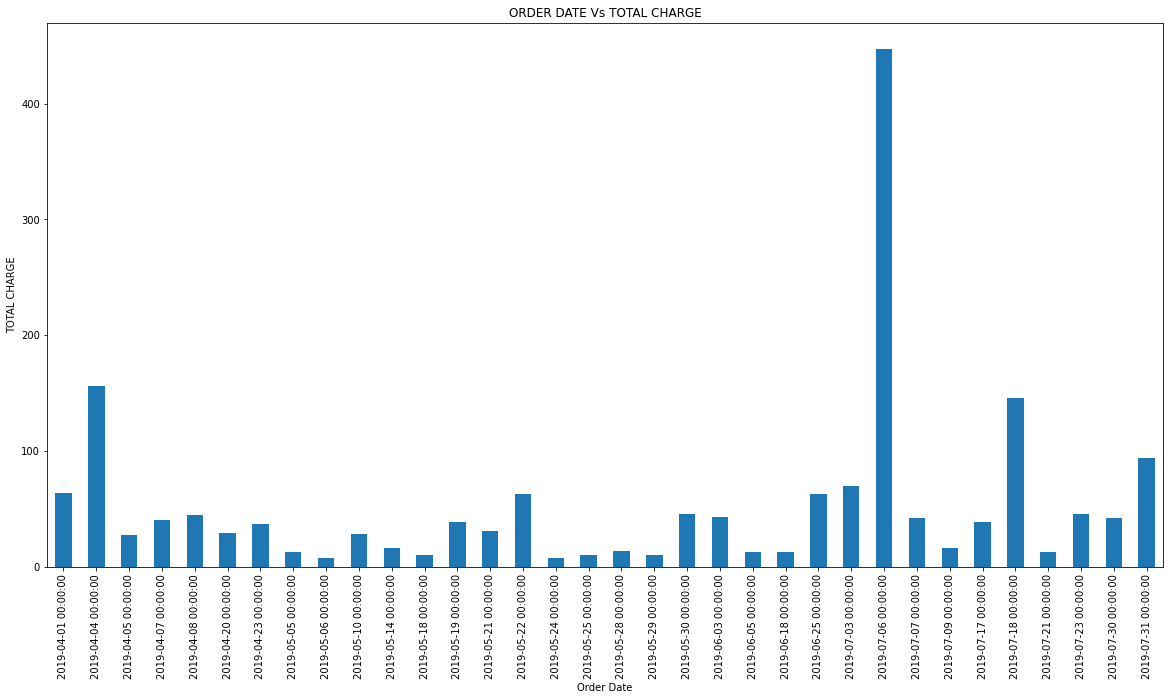

In [26]:
plt.figure()
daily_orders.plot.bar(figsize=(20,10))
plt.title('ORDER DATE Vs TOTAL CHARGE')
plt.ylabel('TOTAL CHARGE')

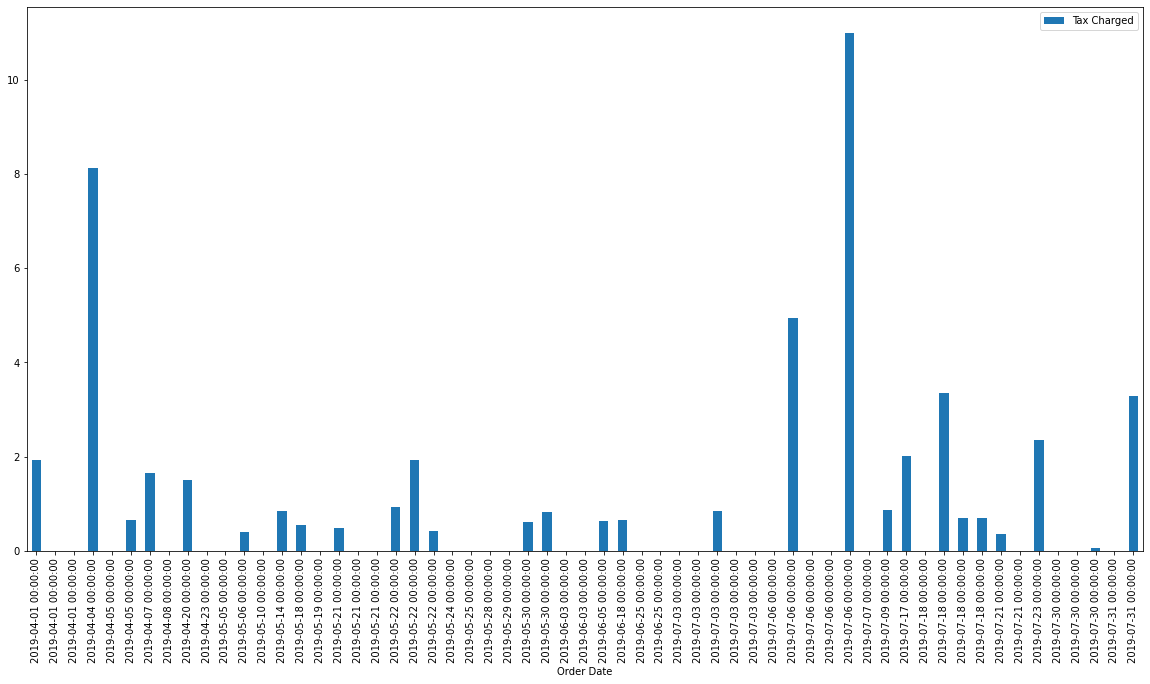

In [28]:
# bar plot for order date Vs tax charged 
df.plot.bar(x='Order Date',y='Tax Charged',rot=90,figsize=(20,10))


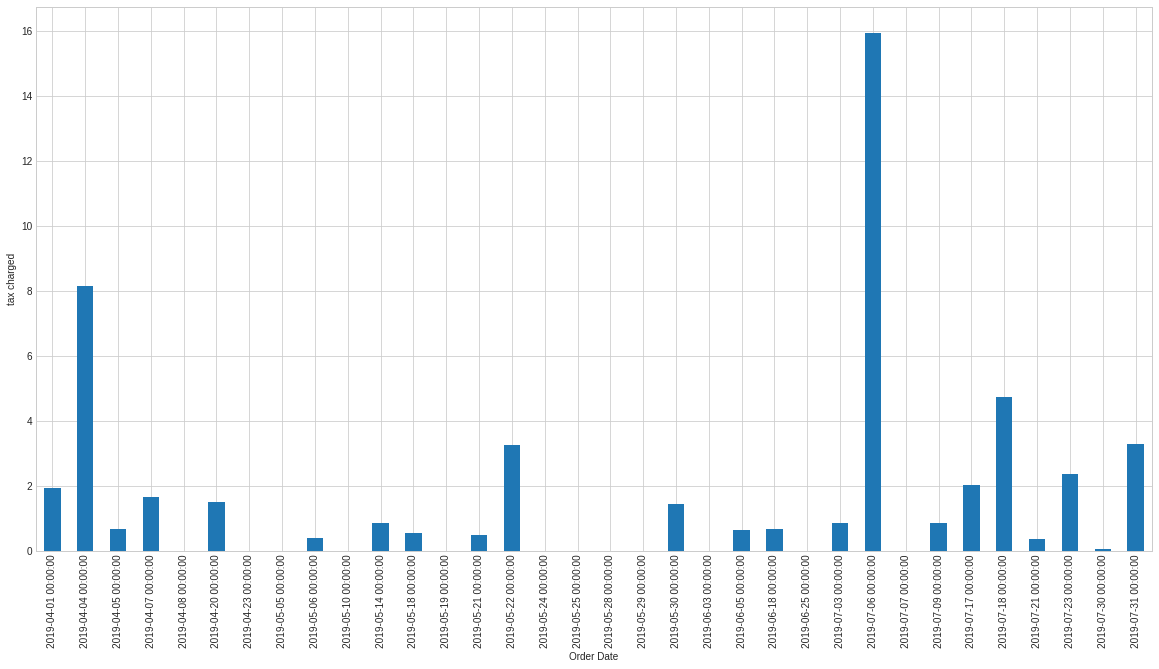

In [31]:
#we can see the missing bars in the above plot as there is only one tax charge corresponding to each time we order 
#in order to correct this bar plot and keep one order per date 
plt.figure()
tax_per_day=df.groupby('Order Date').sum()['Tax Charged']
plt.style.use('seaborn-whitegrid')
plt.ylabel('tax charged')

tax_per_day.plot.bar(figsize=(20,10))
  

In [30]:
#the missing bars in the above graph represent no tax charged
count=0
for x in tax_per_day:
  if x == 0:
    count=count+1
print('Number of orders where the tax charge is 0 :',count)

Number of orders where the tax charge is 0 : 12
